In [ ]:
from datetime import datetime, timedelta


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing Time Series Data

# Data by the hour
first_48_data = pd.read_csv('/content/drive/MyDrive/revised_first_48_by_hr.csv')
first_48_data = first_48_data.dropna(axis=1, how='all')

first_48_data.head()

,Unnamed: 0,time_since_start,measurement_datetime,person_id,visit_occurrence_id,visit_start_datetime,visit_end_datetime,ART BP Diastolic,Arterial Blood Pressure diastolic,Non Invasive Blood Pressure diastolic,...,Admission Weight,pH|Blood|Blood Gas,PH (Arterial),readmission_freq,readmission_id,readmission_time,time_between_readmission,readmission_label,death_label,length_of_stay
0,0,0 days 00:00:00.000000000,2174-05-26 04:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667
1,1,0 days 01:00:00.000000000,2174-05-26 05:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667
2,2,0 days 02:00:00.000000000,2174-05-26 06:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667
3,3,0 days 03:00:00.000000000,2174-05-26 07:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667
4,4,0 days 04:00:00.000000000,2174-05-26 08:20:00,-8090189584974691216,-9133360720296560252,2174-05-26 04:20:00,2174-05-31 14:15:00,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,129.916667


In [ ]:
# Converting timedelta string to float 

time_deltas = first_48_data['time_since_start'].apply(lambda x : pd.to_timedelta(x))

time_delta_floats = time_deltas.apply(lambda x : x / np.timedelta64(1, 'm'))

first_48_data['time_since_start'] = time_delta_floats

print(first_48_data.head())

   Unnamed: 0  time_since_start measurement_datetime            person_id  \
0           0               0.0  2174-05-26 04:20:00 -8090189584974691216   
1           1              60.0  2174-05-26 05:20:00 -8090189584974691216   
2           2             120.0  2174-05-26 06:20:00 -8090189584974691216   
3           3             180.0  2174-05-26 07:20:00 -8090189584974691216   
4           4             240.0  2174-05-26 08:20:00 -8090189584974691216   

   visit_occurrence_id visit_start_datetime   visit_end_datetime  \
0 -9133360720296560252  2174-05-26 04:20:00  2174-05-31 14:15:00   
1 -9133360720296560252  2174-05-26 04:20:00  2174-05-31 14:15:00   
2 -9133360720296560252  2174-05-26 04:20:00  2174-05-31 14:15:00   
3 -9133360720296560252  2174-05-26 04:20:00  2174-05-31 14:15:00   
4 -9133360720296560252  2174-05-26 04:20:00  2174-05-31 14:15:00   

   ART BP Diastolic  Arterial Blood Pressure diastolic  \
0               NaN                                NaN   
1           

In [ ]:
# Getting missingness for each feature

for column in first_48_data.columns[7:-7]:
  
  missingness_rate = len(first_48_data.loc[np.isnan(first_48_data[column])]) / len(first_48_data[column]) 

  print(column, ": ", missingness_rate)


ART BP Diastolic :  0.9818548387096774
Arterial Blood Pressure diastolic :  0.797883064516129
Non Invasive Blood Pressure diastolic :  0.6160954301075269
Manual Blood Pressure Diastolic Left :  0.9996639784946236
Manual Blood Pressure Diastolic Right :  0.9996639784946236
Inspired O2 Fraction :  0.922883064516129
GCS - Eye Opening :  0.8195564516129032
GCS - Motor Response :  0.8209005376344086
GCS - Verbal Response :  0.819388440860215
Glascow coma scale total :  0.8214045698924731
Glucose (serum) :  0.948252688172043
Glucose|Blood|Blood Gas :  0.975638440860215
Heart Rate :  0.42943548387096775
Height :  0.990255376344086
Height (cm) :  0.990255376344086
Arterial Blood Pressure mean :  0.7950268817204301
Non Invasive Blood Pressure mean :  0.6159274193548387
Oxygen Saturation|Blood|Blood Gas :  0.979502688172043
O2 saturation pulseoxymetry :  0.4376680107526882
Arterial O2 Saturation :  0.9907594086021505
Respiratory Rate (Total) :  0.944388440860215
Respiratory Rate (Set) :  0.96051

In [ ]:
# Grouping by admission

data = first_48_data.groupby('visit_occurrence_id')
print(len(data))

124


In [ ]:
# Creating the feature and label data
y_readmission = []
y_mortality = []
y_los = []

i = 0

for group_idx, group_rows in data:

  j = 0

  y_readmission.append(group_rows['readmission_label'].values[0])
  y_mortality.append(group_rows['death_label'].values[0])
  y_los.append(group_rows['length_of_stay'].values[0])

  for idx, row in group_rows.iterrows():
    
    # entry of the matrix
    cur_time_entry = []

    # Creating the row with the necessary feature values
    #cur_time_entry.append(row['time_since_start'])
    
    for feature_name in first_48_data.columns[7:-7]:
      cur_time_entry.append(row[feature_name])

    cur_time_entry = np.array([cur_time_entry])

    
    # To ensure that this works to insert the first row
    if j == 0:

      # matrix of the time series
      X_element = np.array(cur_time_entry)
      
    else:
      X_element = np.concatenate((X_element, np.array(cur_time_entry)))
    
    j += 1

    
  
  # To ensure that this works to insert the first matrix
  if i == 0:

    # Holds all of the multivariate time series
    X = [X_element]
    
  else:
    X = np.concatenate((X, [X_element]))
  
  i += 1

  
  


X_columns = []
#X_columns.append(first_48_data.columns[1])

for feature_name in first_48_data.columns[7:-7]:
  X_columns.append(feature_name)

y_readmission = pd.Series(y_readmission, name='readmission_label')
y_mortality = pd.Series(y_mortality, name='death_label')
y_los = pd.Series(y_los, name='length_of_stay')

y = { 'readmission_label': y_readmission,
       'death_label': y_mortality,
       'length_of_stay': y_los 
}

y = pd.DataFrame(y)

print(len(X))
print(len(y))


124
124


In [ ]:
print(X.shape)

(124, 48, 35)


In [ ]:
# Getting missing rates of each feature for each admission

missing_data_matrix = np.empty((X.shape[0], X.shape[2]))

for i in range(X.shape[0]):
  for j in range(X.shape[2]):
    cur_missing_rate = np.where(np.isnan(X[i,:,j]))[0].size / X[i,:,j].size
    missing_data_matrix[i,j] = cur_missing_rate
    print(cur_missing_rate)



1.0
1.0
0.4166666666666667
1.0
1.0
1.0
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.9583333333333334
1.0
0.3958333333333333
1.0
1.0
1.0
0.4166666666666667
1.0
0.3958333333333333
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.4166666666666667
1.0
1.0
0.7708333333333334
0.9791666666666666
1.0
1.0
1.0
1.0
0.5625
0.4583333333333333
1.0
1.0
0.9583333333333334
0.8125
0.8333333333333334
0.8125
0.8333333333333334
0.8958333333333334
1.0
0.0625
0.9791666666666666
0.9791666666666666
0.5625
0.4583333333333333
0.9166666666666666
0.08333333333333333
1.0
0.9583333333333334
1.0
0.9583333333333334
1.0
0.5625
1.0
1.0
0.4583333333333333
1.0
1.0
0.7916666666666666
0.9791666666666666
0.9583333333333334
0.9583333333333334
1.0
1.0
1.0
0.10416666666666667
1.0
1.0
0.9375
0.7916666666666666
0.7916666666666666
0.7916666666666666
0.7916666666666666
0.9583333333333334
1.0
0.08333333333333333
0.9791666666666666
0.9791666666666666
1.0
0.10416666666666667
0.9791666666666666
0.25
0.9791666666666666

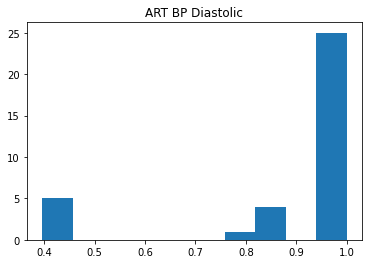

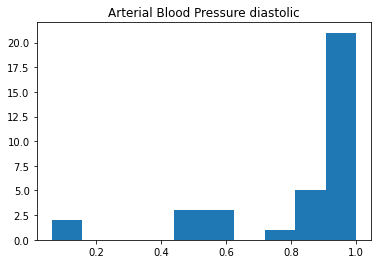

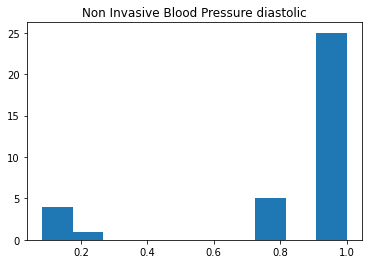

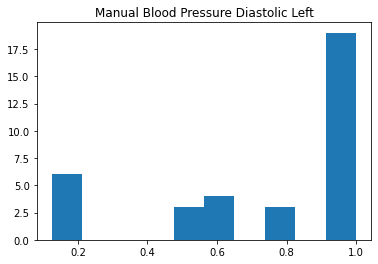

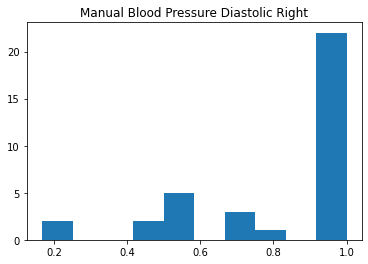

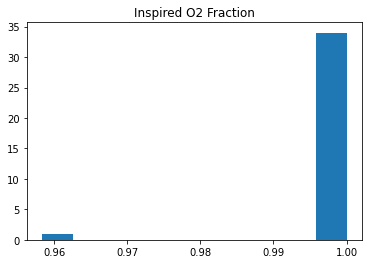

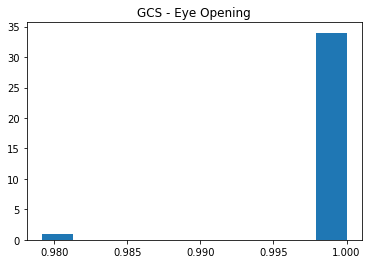

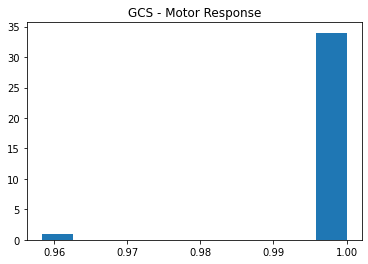

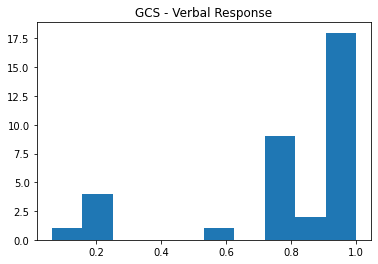

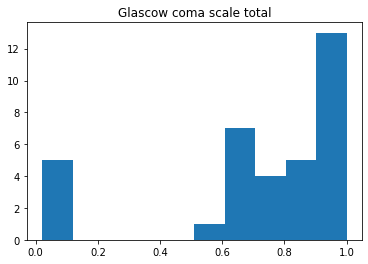

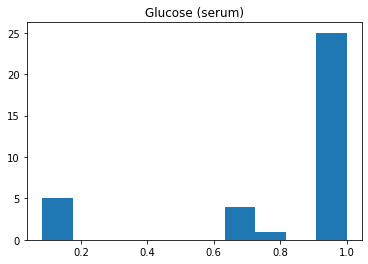

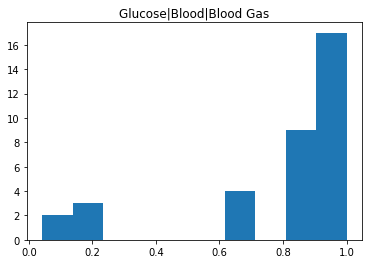

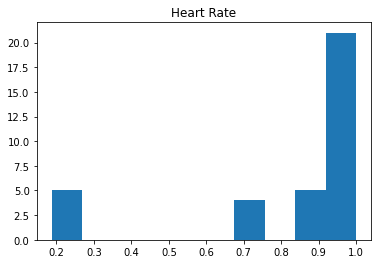

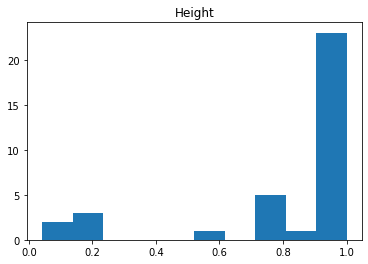

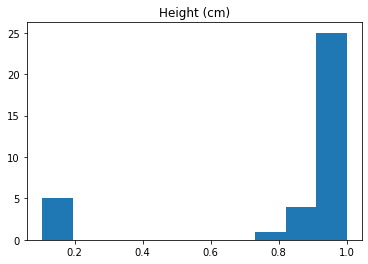

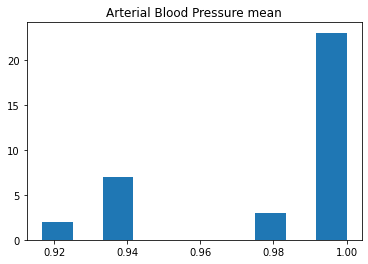

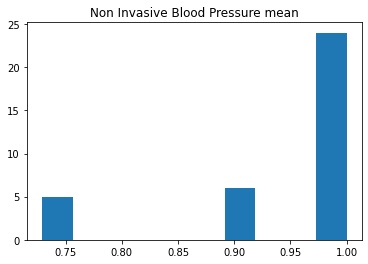

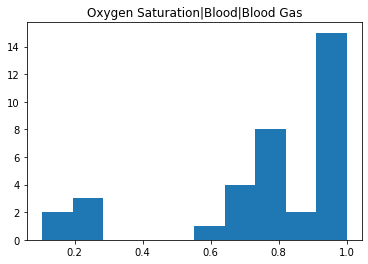

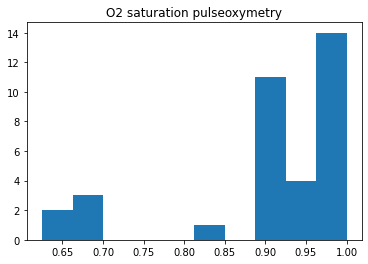

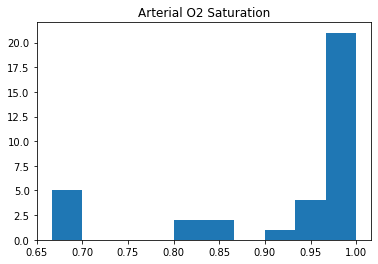

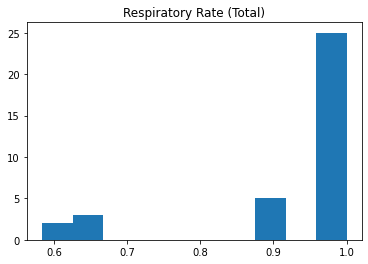

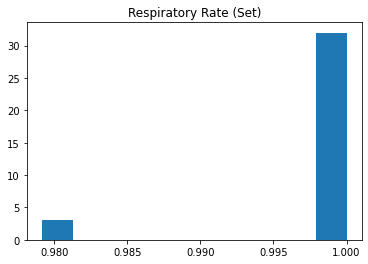

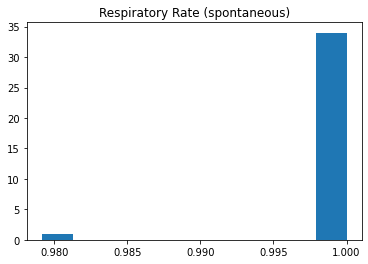

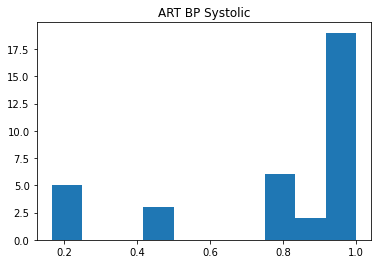

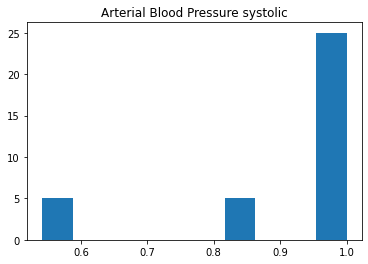

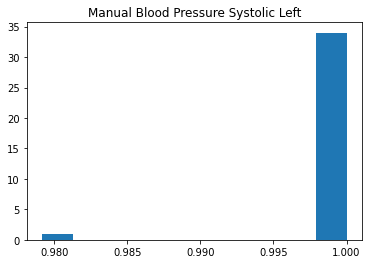

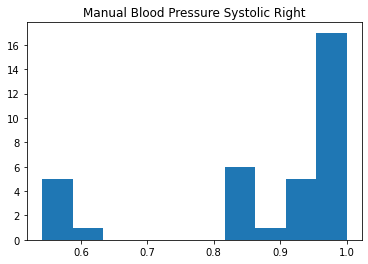

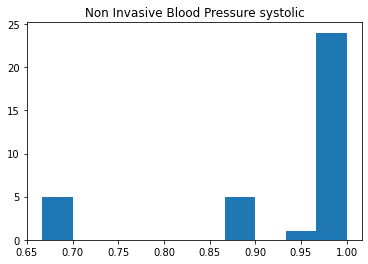

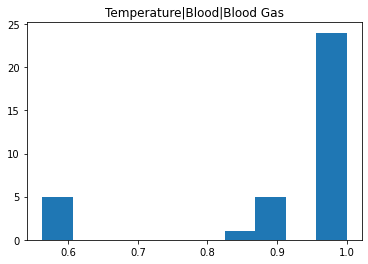

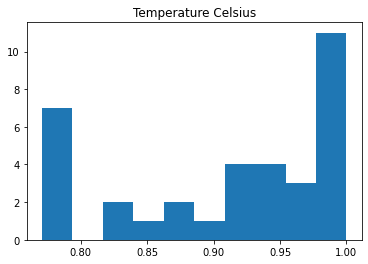

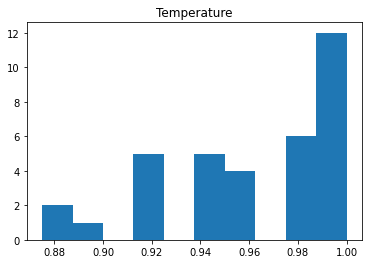

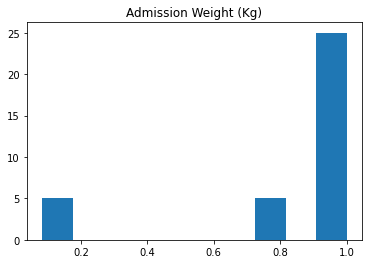

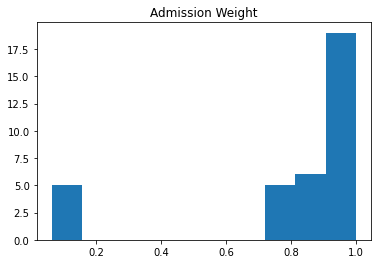

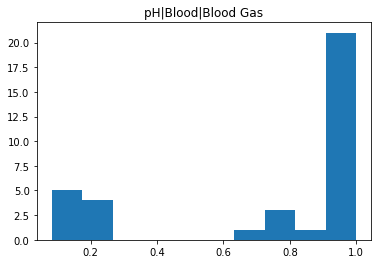

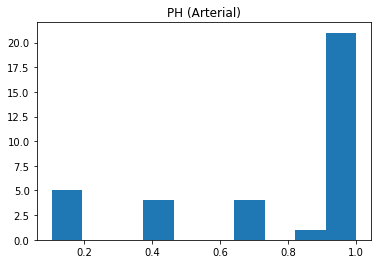

In [ ]:
names = first_48_data.columns[7:-7]
for i in range(X.shape[2]):
  plt.hist(missing_data_matrix[i])
  plt.title(names[i])
  plt.show()


In [ ]:
# Mean missingness rate for each feature across the admissions
for i in range(X.shape[2]):
  missingness_mean = np.mean(missing_data_matrix[i])
  print(names[i], ": ", missingness_mean)


ART BP Diastolic :  0.8880952380952382
Arterial Blood Pressure diastolic :  0.8238095238095238
Non Invasive Blood Pressure diastolic :  0.8297619047619047
Manual Blood Pressure Diastolic Left :  0.7339285714285714
Manual Blood Pressure Diastolic Right :  0.8101190476190476
Inspired O2 Fraction :  0.9988095238095239
GCS - Eye Opening :  0.9994047619047618
GCS - Motor Response :  0.9988095238095239
GCS - Verbal Response :  0.7922619047619048
Glascow coma scale total :  0.7374999999999999
Glucose (serum) :  0.8196428571428571
Glucose|Blood|Blood Gas :  0.7910714285714286
Heart Rate :  0.8291666666666666
Height :  0.8113095238095238
Height (cm) :  0.8452380952380953
Arterial Blood Pressure mean :  0.9809523809523808
Non Invasive Blood Pressure mean :  0.9470238095238096
Oxygen Saturation|Blood|Blood Gas :  0.769047619047619
O2 saturation pulseoxymetry :  0.9095238095238095
Arterial O2 Saturation :  0.9226190476190478
Respiratory Rate (Total) :  0.9273809523809522
Respiratory Rate (Set) :  